In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('911.csv.zip')

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
df.drop(labels = 'e',axis=1,inplace=True)

In [11]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [18]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [19]:
df['Reason']=df['title'].apply(lambda s:s.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [20]:
df['Reason'].value_counts().head(1)

EMS    332692
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

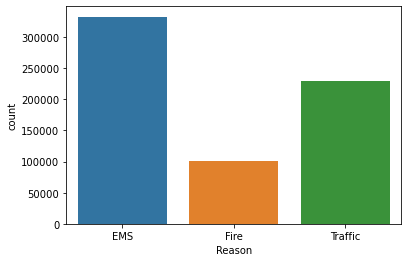

In [21]:
sns.countplot(x='Reason',data=df)

In [22]:
type(df['timeStamp'].iloc[0])

str

In [32]:
df['timeStamp']=df['timeStamp'].apply(lambda s:pd.to_datetime(s))

In [34]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
time=df['timeStamp'].iloc[0]

In [36]:
time

Timestamp('2015-12-10 17:10:52')

In [37]:
time.hour

17

In [38]:
time.dayofweek

3

In [39]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [40]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic,15,7,2
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS,15,7,2
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS,15,7,2
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,Fire,15,7,2


In [41]:
df.sample()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
453767,40.246702,-75.296891,COLUMBIA AVE & S VALLEY FORGE RD; LANSDALE; 20...,19446.0,Traffic: VEHICLE ACCIDENT -,2019-01-30 11:06:40,LANSDALE,COLUMBIA AVE & S VALLEY FORGE RD,Traffic,11,1,2


In [42]:
dmap={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}

In [43]:
df['Day of Week']=df['Day of Week'].apply(lambda day:dmap[day])

In [44]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Wednesday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Wednesday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Wednesday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Wednesday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic,15,7,Tuesday
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS,15,7,Tuesday
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS,15,7,Tuesday
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,Fire,15,7,Tuesday


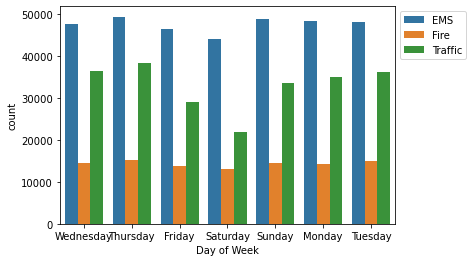

In [45]:
sns.countplot(x='Day of Week', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1,1))

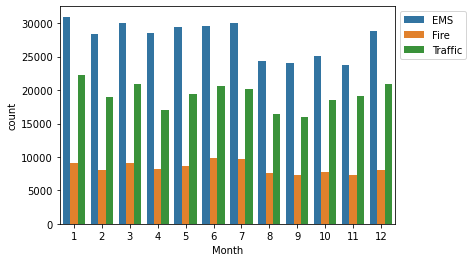

In [46]:
sns.countplot(x='Month',hue='Reason',data =df)
plt.legend(bbox_to_anchor=(1,1))

C:\Users\sanjana-dontha\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\sanjana-dontha\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\sanjana-dontha\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


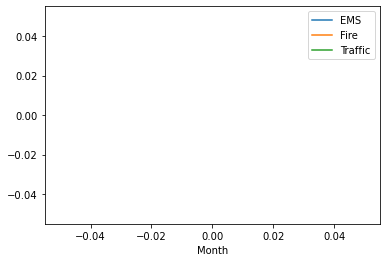

In [49]:
sns.lineplot(x='Month',hue='Reason',data = df)
plt.legend(bbox_to_anchor=(1,1))

In [50]:
bymonth=df.groupby('Month').count()

In [51]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week
Month,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213


bymonth['lat'].head()

<AxesSubplot:xlabel='Month'>

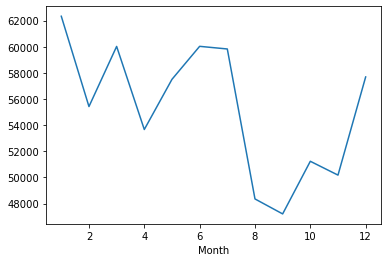

In [57]:
bymonth['lat'].plot()

<AxesSubplot:xlabel='Month', ylabel='lat'>

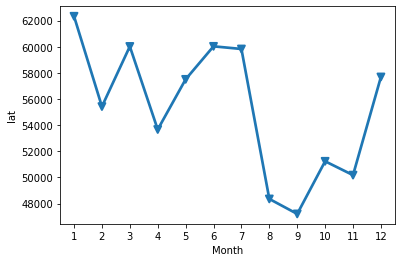

In [61]:
sns.pointplot(x=bymonth.index,y='lat',data=bymonth,markers='v')

In [62]:
bymonth['Month']=bymonth.index
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week,Month
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,1
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,2
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,3
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,4
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,5
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,6
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,7
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,8
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,9


In [65]:
df['Date']=df['timeStamp'].apply(lambda d:d.date())

In [66]:
df['Date'].iloc[0]

datetime.date(2015, 12, 10)

In [67]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Wednesday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Wednesday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Wednesday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Wednesday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Wednesday,2015-12-10


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

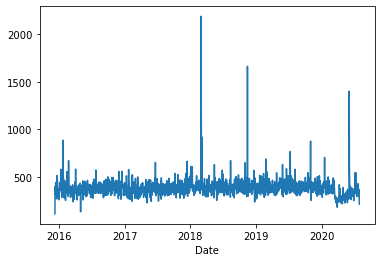

In [70]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout

In [72]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

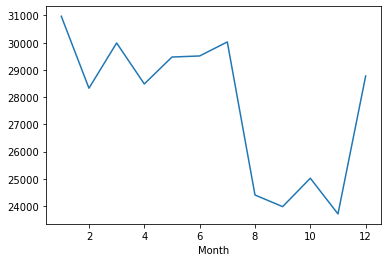

In [73]:
df[df['Reason']=='EMS'].groupby('Month').count()['lat'].plot()
plt.tight_layout

Text(0, 0.5, 'Deaths by Traffic')

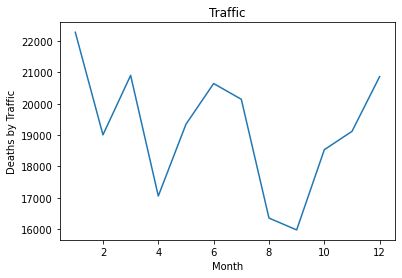

In [77]:
df[df['Reason']=='Traffic'].groupby('Month').count()['lat'].plot()
plt.tight_layout
plt.title('Traffic')
plt.ylabel('Deaths by Traffic')

In [88]:
dfGrid = df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()
dfGrid = dfGrid.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]

KeyError: "None of [Index(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], dtype='object', name='Day of Week')] are in the [index]"

In [89]:
dfGrid

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Monday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Saturday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Sunday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Thursday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Tuesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Wednesday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


In [86]:
dfGrid = dfGrid.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]

KeyError: "None of [Index(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], dtype='object', name='Day of Week')] are in the [index]"

In [90]:
dfGrid

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Monday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Saturday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Sunday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Thursday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Tuesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Wednesday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

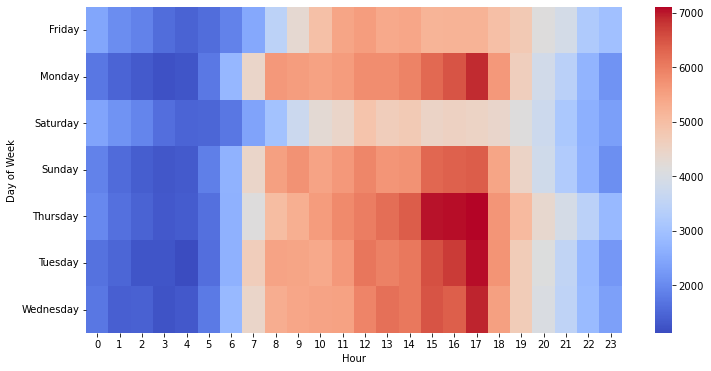

In [98]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dfGrid,cmap='coolwarm')

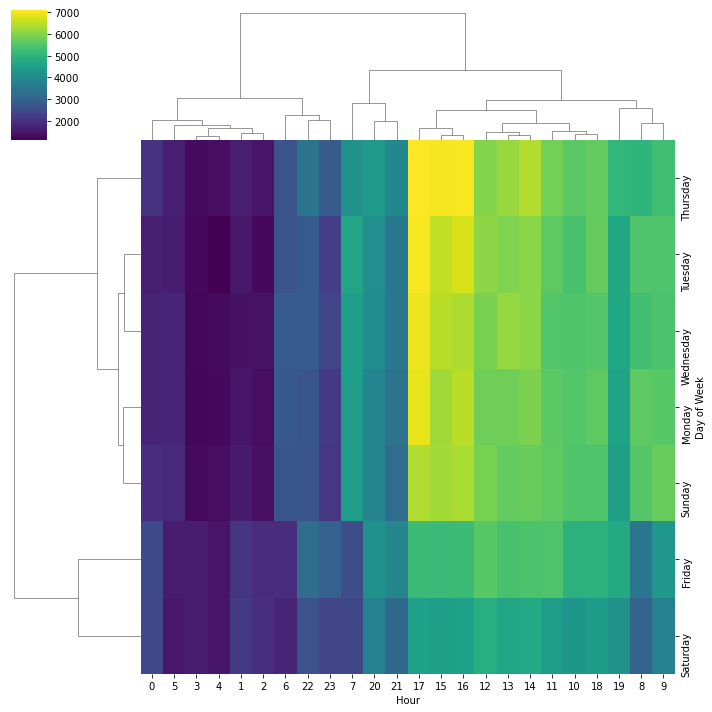

In [99]:
sns.clustermap(dfGrid,cmap='viridis')

In [103]:
dfMonth = df.groupby(['Day of Week','Month']).count()['lat'].unstack()
dfMonth = dfMonth.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
dfMonth

KeyError: "None of [Index(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], dtype='object', name='Day of Week')] are in the [index]"

In [105]:
dfMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Monday,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Saturday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Sunday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Thursday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Tuesday,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682
Wednesday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

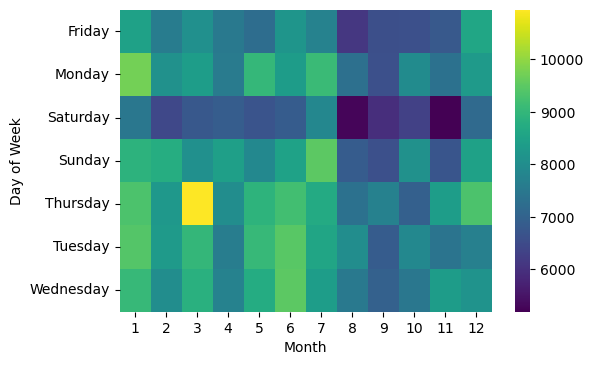

In [106]:
plt.figure(dpi=100)
sns.heatmap(dfMonth,cmap='viridis')

In [ ]:
plt.figure(dpi=100)
sns.clustermap(dfMonth, cmap='viridis')